In [7]:
import pandas as pd
import numpy as num
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 3. Charger le dataset dans un dataframe avec pandas  
df=pd.read_csv(r"D:\data science\Titanic\train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
nombre_de_lignes = df.shape[0]  # Utilisation Afficher  les lignes
print("Nombre de lignes :", nombre_de_lignes)


Nombre de lignes : 891


In [6]:
nombre_de_colonnes = df.shape[1]
print("Nombre de colonnes :", nombre_de_colonnes)

Nombre de colonnes : 12


In [124]:
#4.1Exploration du dataframe 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [125]:
#4.2 Afficher des statistiques descriptives count,mean,min.max pour chaque colomns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
#5. Poser des questions sur les données 
#.Combien de personnes ont survécu dans le dataset Titanic ? 
survécu=df[df['Survived']==1]
print(len(survécu))



342


In [127]:
#5. Poser des questions sur les données 
# Quelle est l'âge moyen des passagers ? 
Moyen_age =df['PassengerId'].mean()
Moyen_age

446.0

In [128]:
#5. Poser des questions sur les données 
#Combien de passagers avaient un âge supérieur à 30 ans ? 
Age_sup =df[df['Age']>30]
print(len(Age_sup))



305


In [28]:
#6.. Filtrage et analyses personnalisées 
#Afficher les passagers dont le ticket est plus cher que 100 : 
Ticket_cher=df[df['Fare']>100]
Ticket_cher




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,1,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,1,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,1,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [31]:
#Comparer les moyennes de l'âge entre les hommes et les femmes :
Compare_age =df.groupby('Sex')['Age'].mean()
Compare_age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [129]:
#As-tu trouvé des valeurs manquantes dans tes données ? Si oui, comment pourrais-tu les gérer ? 
''' oui des valeur null de la colonnes Age,Cabine,Embarked'''
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
df[['Age','Cabin','Embarked']].head(50)

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
5,NaN,NaN,Q
6,54.0,E46,S
7,2.0,NaN,S
8,27.0,NaN,S
9,14.0,NaN,C


In [131]:
#Afficher les index la colonne vide
positions_nulles = df[df['Embarked'].isnull()].index
positions_nulles

Index([61, 829], dtype='int64')

In [132]:
df_subset = df.loc[50:71,'Embarked'] 
df_subset


50      S
51      S
52      C
53      S
54      C
55      S
56      S
57      C
58      S
59      S
60      C
61    NaN
62      S
63      S
64      C
65      C
66      S
67      S
68      S
69      S
70      S
71      S
Name: Embarked, dtype: object

In [133]:
'''at est plus rapide que loc si vous devez accéder ou modifier une seule cellule. En revanche, 
loc est plus polyvalent et peut être utilisé pour accéder à plusieurs lignes et colonnes à la fois.'''
df.at[61, 'Embarked'] = 's'
df.isnull().sum

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False   True     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 colum

In [60]:
df_829=df.loc[810:840,'Embarked']
df_829

810      S
811      S
812      S
813      S
814      S
815      S
816      S
817      C
818      S
819      S
820      S
821      S
822      S
823      S
824      S
825      Q
826      S
827      C
828      Q
829    NaN
830      C
831      S
832      C
833      S
834      S
835      C
836      S
837      S
838      S
839      C
840      S
Name: Embarked, dtype: object

In [134]:
df.at[829, 'Embarked'] = 's'
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [135]:
 #Afficher les index la colonne vide
positions_nulles = df[df['Age'].isnull()].index
positions_nulles

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [136]:
df_age=df.loc[5:20,'Age']
df_age


5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
Name: Age, dtype: float64

In [153]:
#Remplace NaN par age moyen
Moyen_age =df['Age'].mean()
df['Age'].fillna(Moyen_age,inplace=True)


C:\Users\djidji\AppData\Local\Temp\ipykernel_16132\3052391345.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(Moyen_age,inplace=True)


In [154]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [72]:
 #Afficher les index la colonne vide
positions_nulles = df[df['Cabin'].isnull()].index
positions_nulles

Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
       ...
       878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
      dtype='int64', length=687)

In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [75]:
Cabin=df.loc[0:50,'Cabin']
Cabin

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
30            NaN
31            B78
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
41            NaN
42            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
50            NaN
Name: Cabin, dtype: object

In [151]:
df['Cabin'].fillna('Aucun',inplace=True)



In [81]:
''' Peux-tu extraire d'autres insights intéressants du dataset (par exemple, des relations entre 
les variables, des corrélations) ?'''
#Calcul de la corrélation entre les colonnes numériques.
#( l'âge (Age) et le prix du billet (Fare), car ce sont des variables numériques et leur relation peut avoir du sens.)
correlation = df[['Age', 'Fare']].corr()
correlation

# La corrélation très faible entre les deux variables que vous avez analysée 0.091

,Age,Fare
Age,1.000000,0.091566
Fare,0.091566,1.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


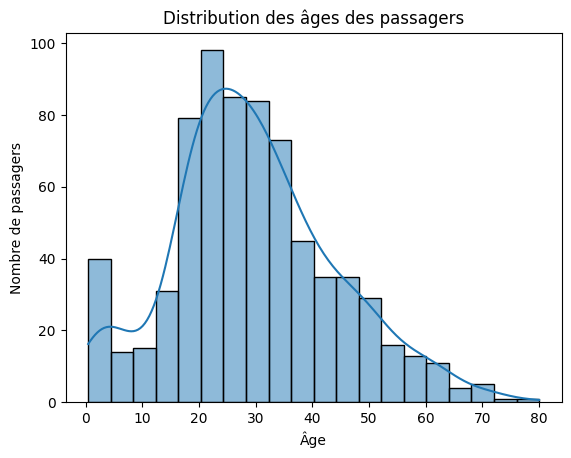

In [89]:
#Tracer un graphique de distribution de l'âge 
#1. Histogramme (hist)
#Utilisation : Affiche la répartition d'une variable numérique continue (par exemple, les âges, les salaires, etc.).
sns.histplot(df['Age'], kde=True)
plt.title('Distribution des âges des passagers') 
plt.xlabel('Âge') 
plt.ylabel('Nombre de passagers') 
plt.show() 

<Axes: xlabel='Pclass', ylabel='count'>

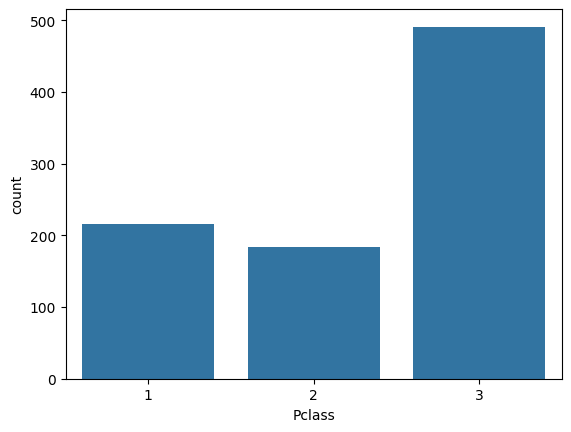

In [163]:
# Analyse des Colonnes Clés 
# Type de Passager (Pclass) 
sns.countplot(x='Pclass',data=df)


<Axes: xlabel='Survived', ylabel='Age'>

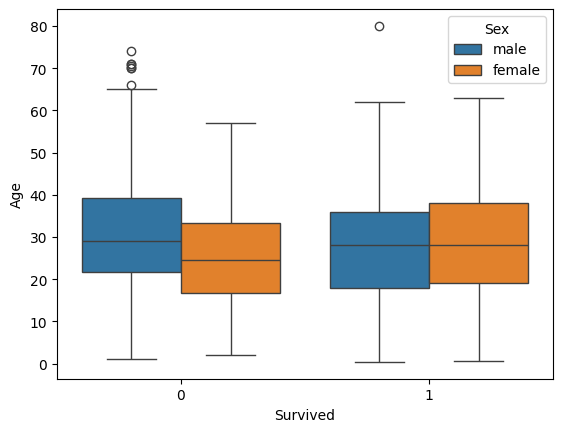

In [24]:
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df) 

<Axes: xlabel='Survived', ylabel='Age'>

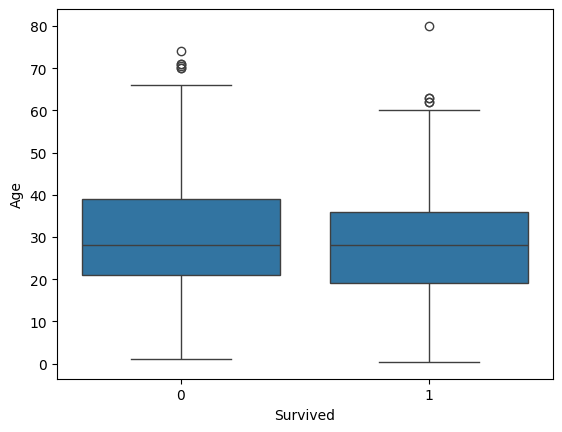

In [23]:
sns.boxplot(x='Survived', y='Age', data=df)

<Axes: xlabel='count', ylabel='Sex'>

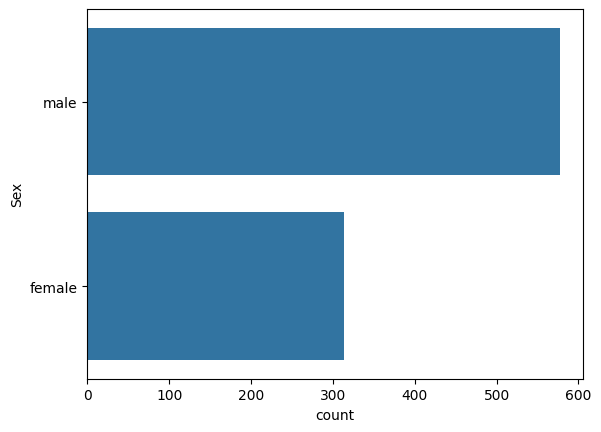

In [21]:
'''Le sexe semble être un facteur clé de la survie, donc il est crucial de l'analyser. 
# Répartition par sexe '''
sns.countplot(y='Sex',data=df)

<Axes: xlabel='Age', ylabel='Count'>

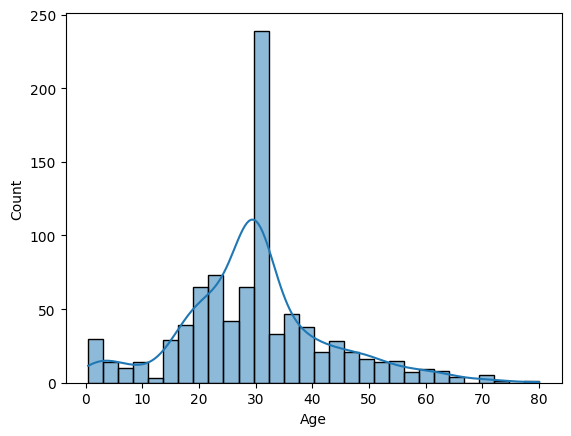

In [170]:
#3.3 Âge des Passagers

sns.histplot(df['Age'].dropna(), kde=True) 

<Axes: xlabel='Fare', ylabel='Count'>

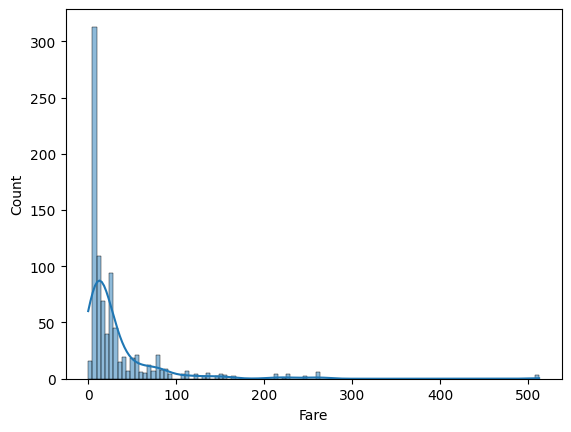

In [8]:
#3.4 Tarif Payé (Fare) 
sns.histplot(df['Fare'], kde=True)

<Axes: xlabel='Survived', ylabel='count'>

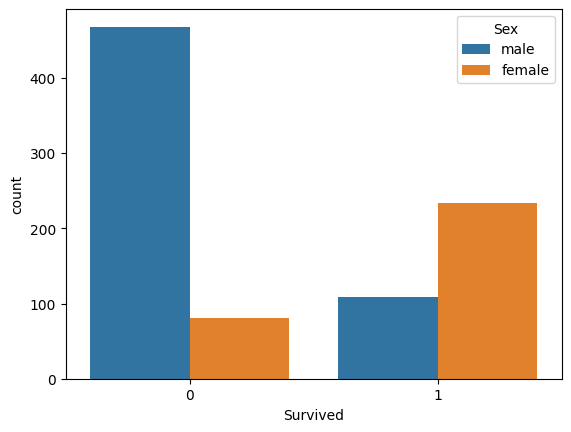

In [9]:
#4.1 Survie selon le Sexe 
# Comparer la survie en fonction du sexe 
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

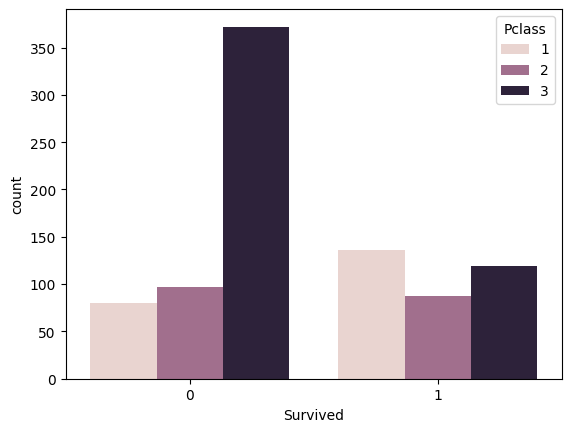

In [13]:
#Les passagers de première classe ont-ils eu plus de chances de survivre ? 

sns.countplot(x='Survived', hue='Pclass', data=df)

<Axes: xlabel='Survived', ylabel='Count'>

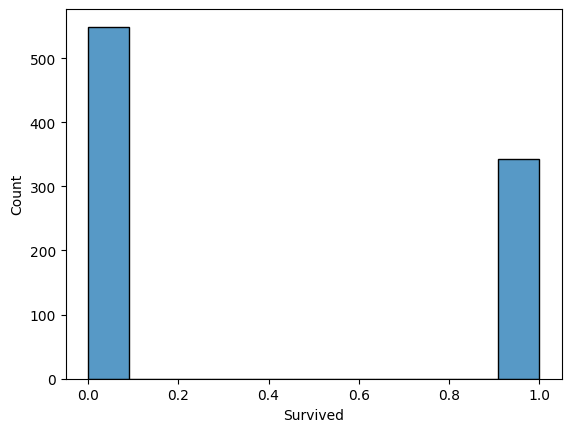

In [19]:
sns.histplot(df['Survived'])

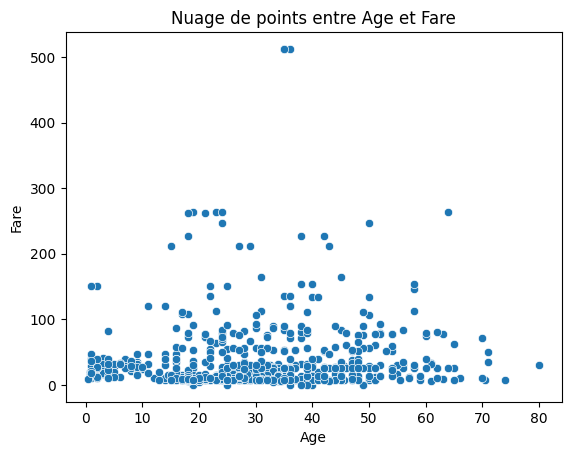

In [35]:
sns.scatterplot(x=df['Age'], y=df['Fare'])
plt.title("Nuage de points entre Age et Fare")
plt.show()


In [36]:
corrilation =df['Age'].corr(df['Fare'])
corrilation


0.09606669176903888

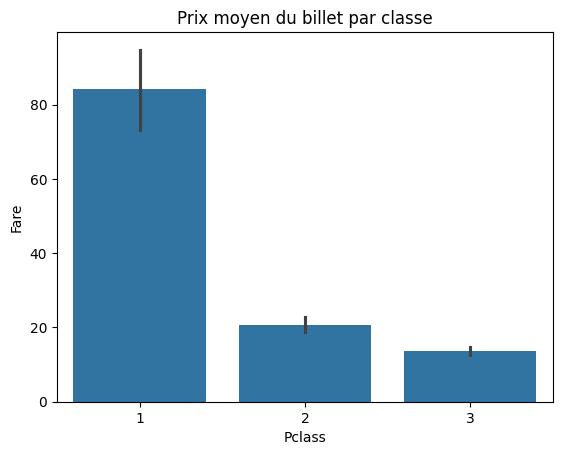

In [37]:
sns.barplot(x='Pclass', y='Fare', data=df)
plt.title("Prix moyen du billet par classe")
plt.show()



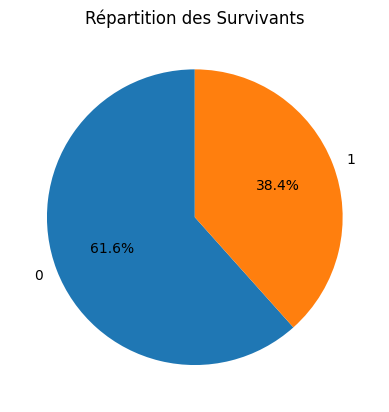

In [44]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Répartition des Survivants")
plt.ylabel('')
plt.show()


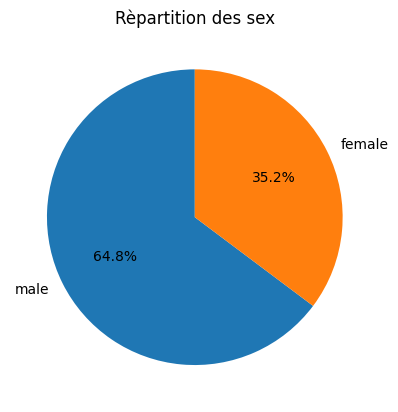

In [57]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.title('Rèpartition des sex')
plt.ylabel('')
plt.show()

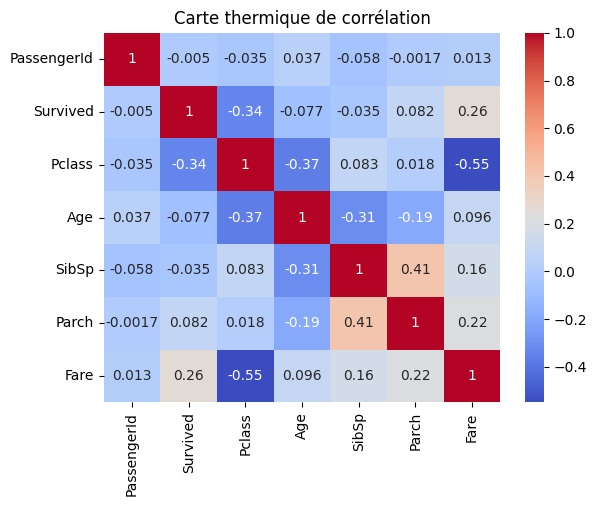

In [63]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Carte thermique de corrélation")
plt.show()
